# International Roughness Index (IRI) plotting data

### 1. Open Dataset
The dataset we will use, which has been previously mined: 
- Centerline_IRI_2019_2_20200518.shp in https://gisportal.binamarga.pu.go.id/arcgis/rest/services/ maybe licensed

In [14]:
# Import necessary modules
import matplotlib as cm
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as cx
import folium

In [1]:
# Set filepath
fp = "../02-raw-data/Centerline_IRI_2019_2_20200518.shp"

# Read road data file
data = gpd.read_file(fp)

### 2. Let’s see check the data type of it
Preparing and explore data

In [2]:
type(data) #Check type of data 

geopandas.geodataframe.GeoDataFrame

### 3. Overview data
Let’s take a look at our data and print the first & last 5 rows:

In [22]:
#Print name of colomns and length of dataframe
print(data.columns, len(data))

#Show DataFrame
data.head(-1)

Index(['LINKID', 'STA_FROM_D', 'STA_TO_DAM', 'MAX_IRI', 'MEAN_IRI',
       'MAX_IRI_PO', 'MEAN_IRI_P', 'SHAPE_LEN', 'NM_RUAS', 'geometry'],
      dtype='object') 465946


,LINKID,STA_FROM_D,STA_TO_DAM,MAX_IRI,MEAN_IRI,MAX_IRI_PO,MEAN_IRI_P,SHAPE_LEN,NM_RUAS,geometry
0,01001,0,10,3.91,3.6600,3.91,3.6600,100.000023,KRUENG RAYA - BTS. KOTA BANDA ACEH,"LINESTRING Z (-2191395.741 602207.111 -0.000, ..."
1,01001,10,20,3.93,3.6000,3.93,3.6000,100.000014,KRUENG RAYA - BTS. KOTA BANDA ACEH,"LINESTRING Z (-2191306.982 602252.328 -0.000, ..."
2,01001,20,30,3.66,3.3925,3.66,3.3925,99.999946,KRUENG RAYA - BTS. KOTA BANDA ACEH,"LINESTRING Z (-2191223.740 602307.744 -0.000, ..."
3,01001,30,40,3.81,3.6800,3.81,3.6800,99.999977,KRUENG RAYA - BTS. KOTA BANDA ACEH,"LINESTRING Z (-2191140.026 602362.440 -0.000, ..."
4,01001,40,50,3.80,3.5950,3.80,3.5950,100.000040,KRUENG RAYA - BTS. KOTA BANDA ACEH,"LINESTRING Z (-2191056.777 602417.837 -0.000, ..."
...,...,...,...,...,...,...,...,...,...,...
465940,63032,4520,4530,3.00,3.0000,3.00,3.0000,100.000000,MAKBON - MEGA,"LINESTRING Z (1873213.493 -90596.658 -0.000, 1..."
465941,63032,4530,4540,3.00,3.0000,3.00,3.0000,100.000015,MAKBON - MEGA,"LINESTRING Z (1873259.556 -90508.053 -0.000, 1..."
465942,63032,4540,4550,3.00,3.0000,3.00,3.0000,99.999964,MAKBON - MEGA,"LINESTRING Z (1873312.688 -90423.797 -0.000, 1..."
465943,63032,4550,4560,3.00,3.0000,3.00,3.0000,99.999960,MAKBON - MEGA,"LINESTRING Z (1873372.700 -90343.829 -0.000, 1..."


### 5. Check Coordinate System
Let’s check:

In [4]:
# Check the coordinate reference system
data.crs

<Derived Projected CRS: PROJCS["Indonesia Lambert Conformal Conic",GEOGCS[ ...>
Name: Indonesia Lambert Conformal Conic
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 6. Check Plot
Let’s try it out, and take a look how our data looks like on a map:

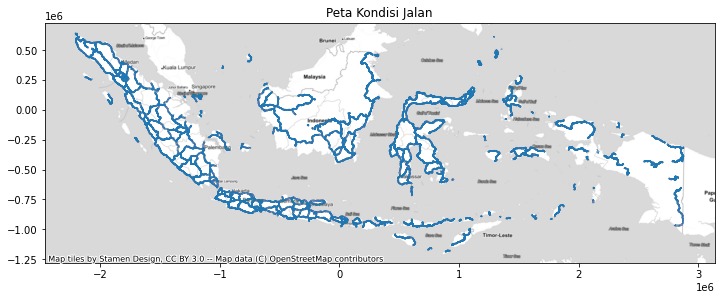

In [23]:
# create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# add roads to the plot
data.plot(ax=ax, alpha=.5)

# add a title for the plot
ax.set_title("Peta Kondisi Jalan");
cx.add_basemap(ax, crs=data.crs, source=cx.providers.Stamen.TonerLite)